In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv('D:\download new\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv')
#pd.read_csv is a function provided by the pandas library in Python.
#It is used to read data from a CSV (Comma-Separated Values) file and create a pandas DataFrame, which is a tabular data structure.

In [6]:
#gives rows & cols in table
df.shape


(11251, 15)

In [7]:
df.head()
#gives names of all the cols and first 5 rows by default

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra�Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
#axis=1 - deletes the whole vertical col and inplace is to keep the change throughout
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
#to find total null values in each col
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
#deleting the null values
df.dropna(inplace=True)
df.shape

(11239, 13)

In [13]:
#change data type and retain the change throughout:: also col name is always in []
df['Amount']=df['Amount'].astype('int')
#check datatype
df['Amount'].dtypes

dtype('int32')

In [14]:
df['Amount'].describe()

count    11239.000000
mean      9453.610553
std       5222.355168
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64

EDA

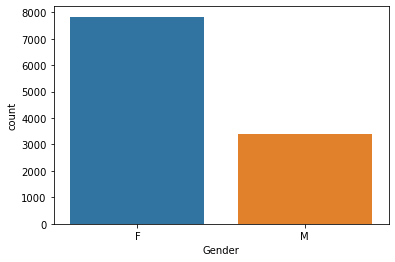

In [15]:
#plotting graph for gender
ax=sns.countplot(x='Gender',data=df)
#to show total no of purchases for each
#for bars in ax.containers:
  #  ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

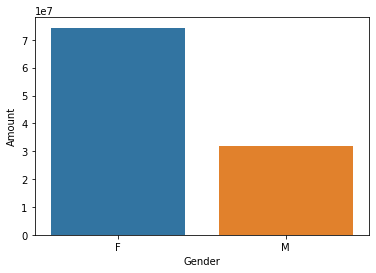

In [16]:
#summing up the amount of sales for each gender and sorting them by amount
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

Females bought more and amount spent is more for female

<AxesSubplot:xlabel='Age Group', ylabel='count'>

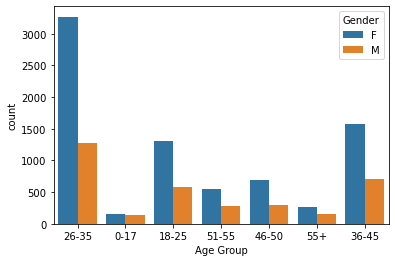

In [17]:
#plotting for age-group
sns.countplot(x='Age Group',hue='Gender',data=df)
#hue divides data on the basis of given parameter

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

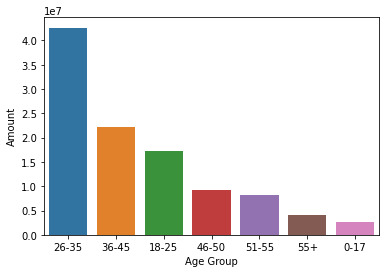

In [18]:
#total amount vs age group
amount=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=amount)

most of the buyers are in age group 26-35 and are female.

<AxesSubplot:xlabel='State', ylabel='Orders'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


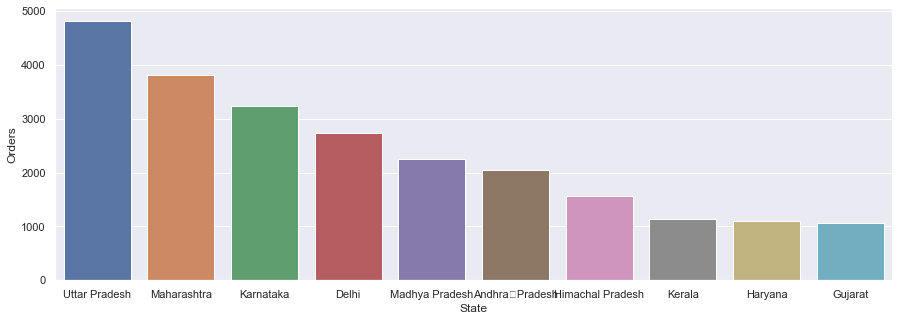

In [19]:
#total no of orders from top 10 states
state_sales=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data=state_sales)

<AxesSubplot:xlabel='State', ylabel='Amount'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


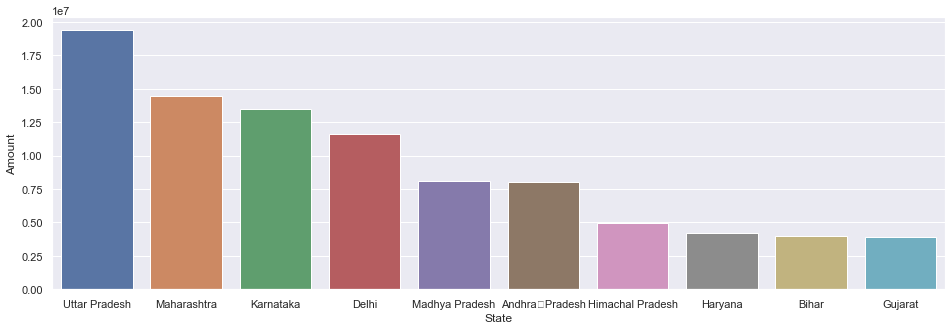

In [20]:
#total amount spent by top 10 states
amount_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State',y='Amount',data=amount_state)

kerela placed more orders than haryana but haryana spent more than kerela and so did gujrat and bihar so kerela is not in the top 10 states to spend on diwali shopping

#on basis of marital status
sns.countplot(x='Marital_Status',data=df,hue='Gender')
sns.set(rc={'figure.figsize':(5,5)})


married women have bought the most.

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

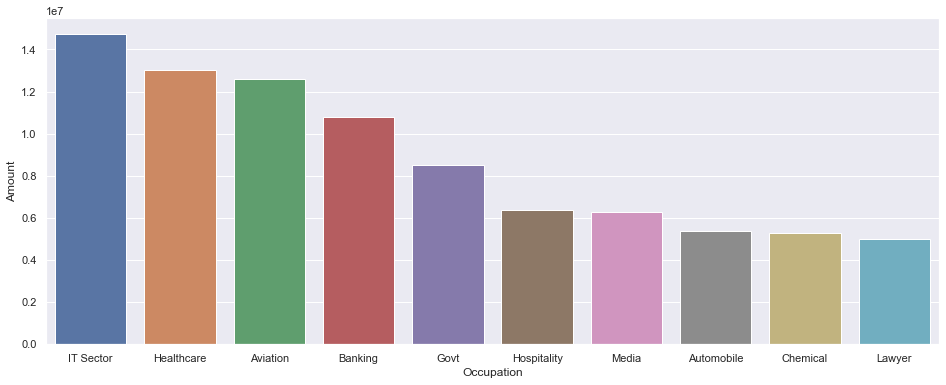

In [22]:
#occupation based top 10
occupation_based=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(x='Occupation',y='Amount',data=occupation_based)

IT sector employees spends the most.

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

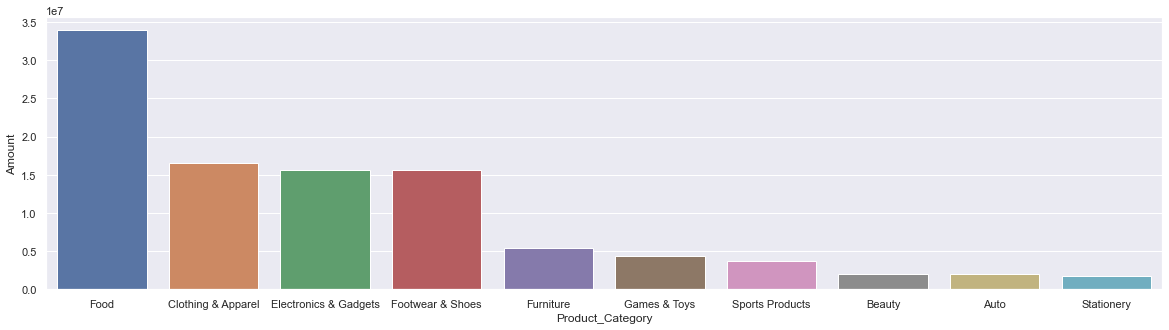

In [30]:
#sales of top 10 product
product_sales=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount',data=product_sales)

most of the diwali shopping is done for food,clothing&apparel,electronics &gadgets

Conclusion


Married women b/w 26-35 of Uttar Pradesh ,mostly working in IT Sector spends on food, clothing& apparel and electronics& gadgets.